In [13]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Aroogz\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


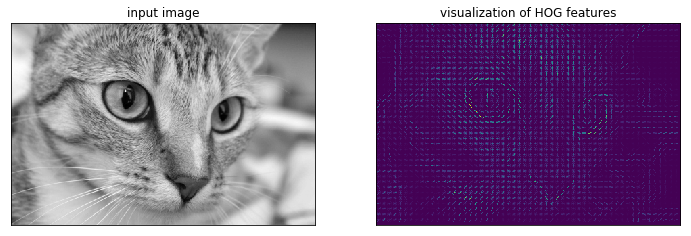

In [2]:
from skimage import data, color, feature
import skimage.data
image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualise=True)
fig, ax = plt.subplots(1, 2, figsize=(12, 6),
subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

### HOG in Action: A simple Face Detector

- __Obtain a set of positive training a sample__

In [4]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

In [7]:
# obtain a set of negative training samples
from skimage import data, transform

imgs_to_use = ['camera', 'text', 'coins', 'moon',
                'page', 'clock', 'immunohistochemistry',
                'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) 
         for name in imgs_to_use]

In [11]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0,
                   patch_size=positive_patches[0].shape):
    extracted_patch_size= \
    tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
    max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
        for patch in patches])
    return patches

In [14]:
negative_patches = np.vstack([extract_patches(im, 1000, scale)
for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

C:\Users\Aroogz\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(30000, 62, 47)

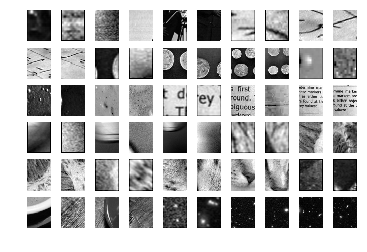

In [17]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

Our hope is that these would sufficiently cover the space of “nonfaces” that our
algorithm is likely to see.

In [ ]:
# combining the samples and compute HOG features
from itertools import chain
X_train = np.array([feature.hog(im)
                   for im in chain(positive_patches,
                                  negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [21]:
X_train.shape

(43233, 1215)